# importing

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, precision_score, recall_score, f1_score
)

In [5]:
df_pop = pd.read_csv('D:/Tyler_Data/Other Skills/Datascience/MMDT_GitHub/MMDT_2025_MLAI101/Htet-Aung-Phyo/Final_project/final_data.csv')

In [6]:
df_pop.head()

,age,sex,race,marital_status,tumor_size,tumor_spread,tumor_lymph_nodes,surgery_primary,chemotherapy,PrimarySiteGroup,COD_2,location_collapsed,income_cat,AJCC_collapsed,radiation_collapsed
0,63,Female,White,Widowed,90,100,0,1,No/Unknown,Respiratory system,Other,metro,"$95,000 - $99,999",I,0
1,85,Male,White,Married (including common law),989,400,0,1,No/Unknown,Skin,Other,metro,"$110,000 - $119,999",I,0
2,81,Male,White,Divorced,55,200,0,1,No/Unknown,Skin,Cancer,metro,"$100,000 - $109,999",II,0
3,68,Female,White,Married (including common law),989,610,0,1,Yes,Female genital organs,Cancer,metro,"$95,000 - $99,999",III,0
4,70,Female,Black,Single (never married),80,100,0,1,No/Unknown,Breast,Other,metro,"$90,000 - $94,999",II,1


In [7]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554067 entries, 0 to 554066
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   age                  554067 non-null  int64 
 1   sex                  554067 non-null  object
 2   race                 554067 non-null  object
 3   marital_status       554067 non-null  object
 4   tumor_size           554067 non-null  int64 
 5   tumor_spread         554067 non-null  int64 
 6   tumor_lymph_nodes    554067 non-null  int64 
 7   surgery_primary      554067 non-null  int64 
 8   chemotherapy         554067 non-null  object
 9   PrimarySiteGroup     554067 non-null  object
 10  COD_2                554067 non-null  object
 11  location_collapsed   554067 non-null  object
 12  income_cat           554067 non-null  object
 13  AJCC_collapsed       554067 non-null  object
 14  radiation_collapsed  554067 non-null  int64 
dtypes: int64(6), object(9)
memory usag

# sampling to 50,000 rows

In [8]:
df = df_pop.sample(50000, random_state=42)

In [9]:
df = df.astype({'age':'int16',
                'tumor_size':'int16',
                'tumor_spread':'int16',
                'tumor_lymph_nodes':'int16'})
df = df.astype({'surgery_primary':'category',
                'sex':'category',
                'race':'category',
                'marital_status':'category',
                'chemotherapy':'category',
                'PrimarySiteGroup':'category',
                'COD_2':'category',
                'income_cat':'category',
                'location_collapsed':'category',
                'AJCC_collapsed':'category',
                'radiation_collapsed':'category'})

# EDA

In [10]:
numeric= df.select_dtypes(include=['int16']).columns
categorical = df.select_dtypes(include=['category']).columns

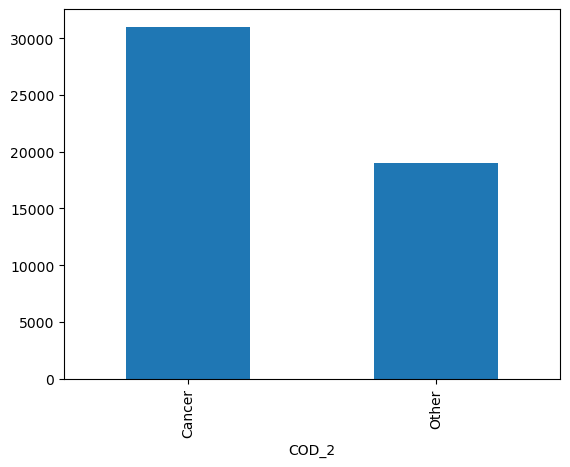

In [11]:
df['COD_2'].value_counts().plot(kind='bar')
plt.show()

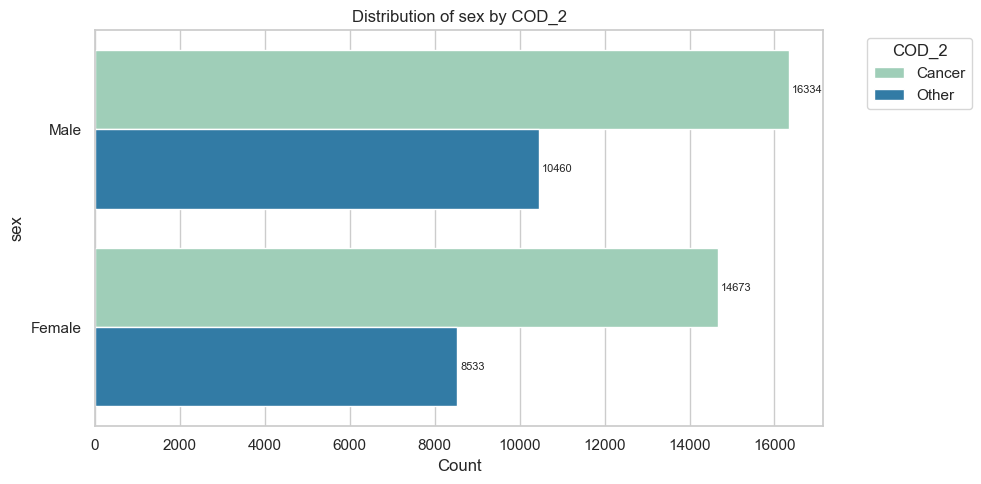

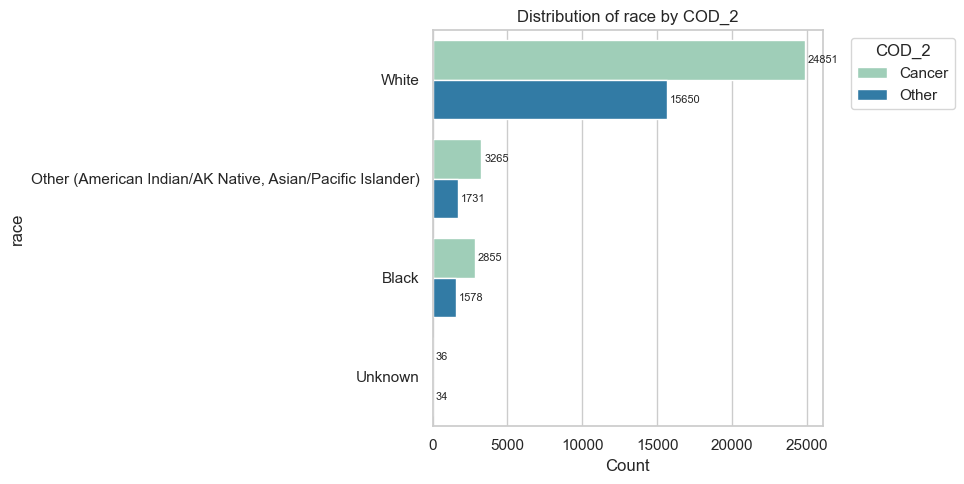

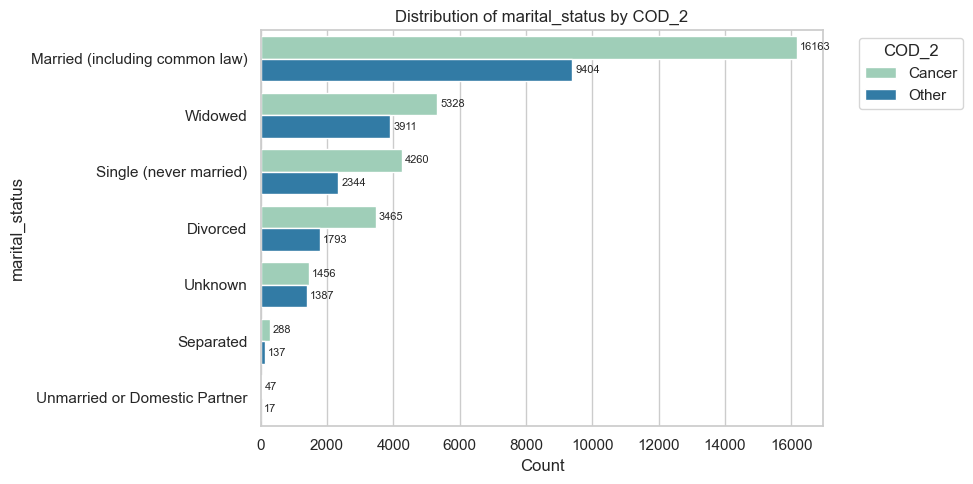

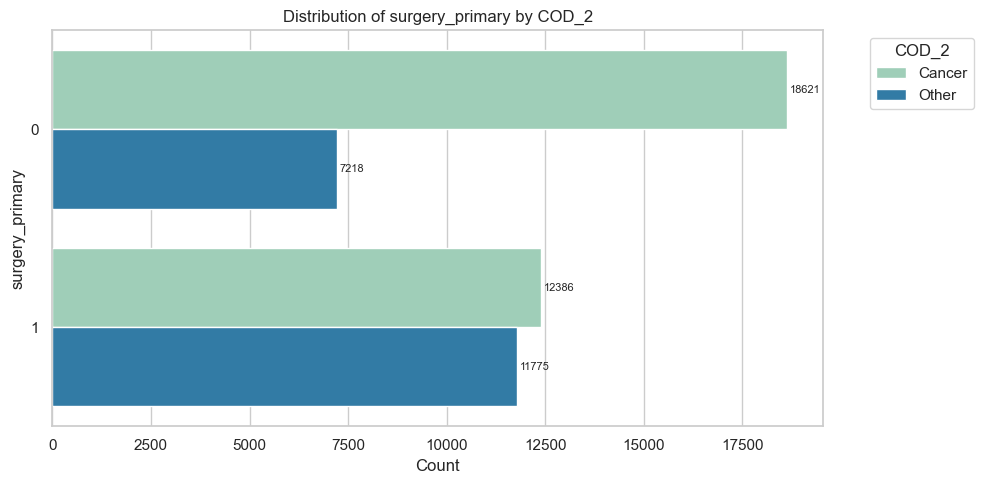

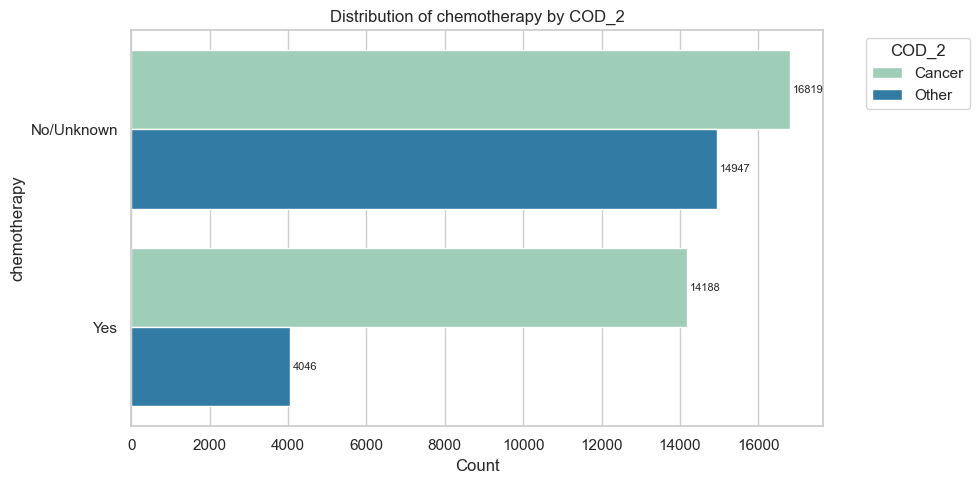

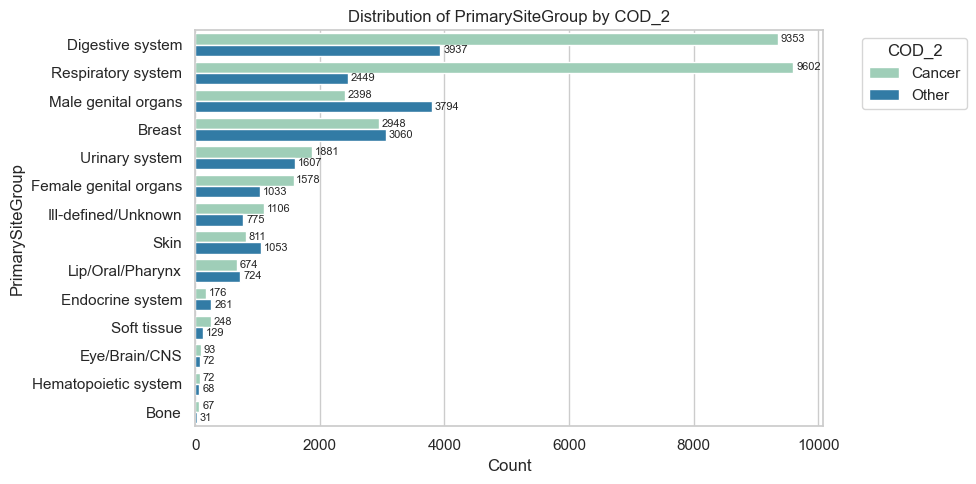

C:\Users\Htet\AppData\Local\Temp\ipykernel_16828\3988345908.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="COD_2", bbox_to_anchor=(1.05, 1), loc='upper left')


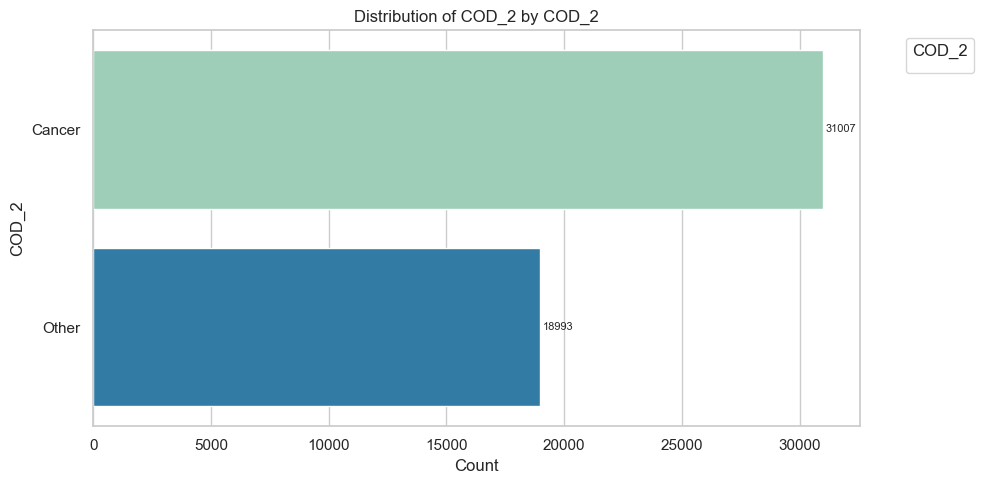

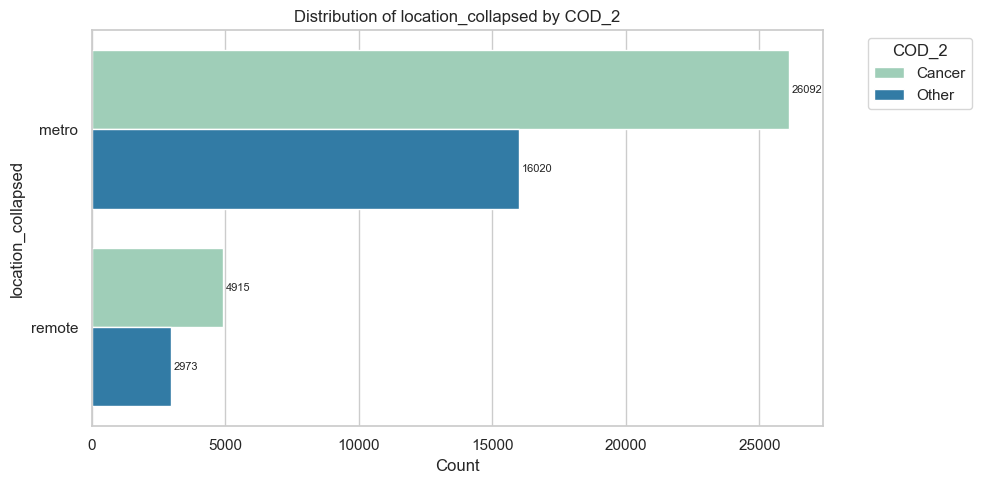

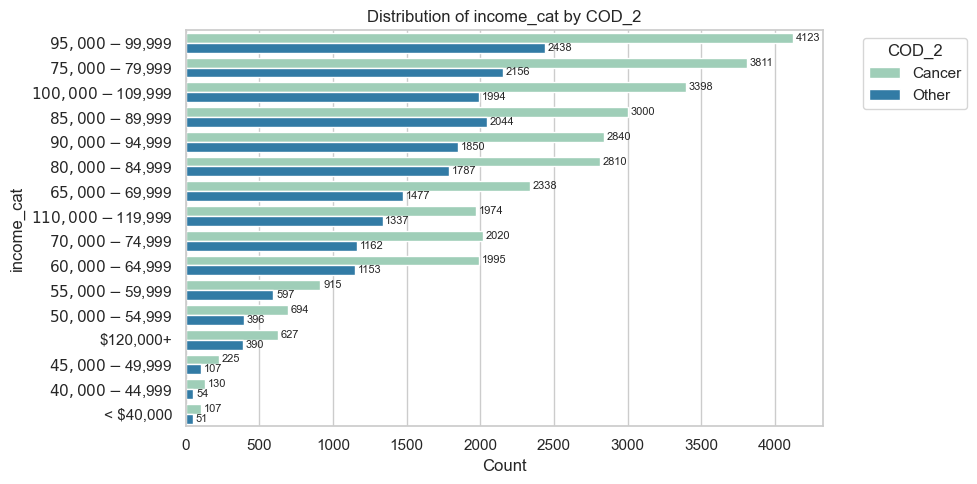

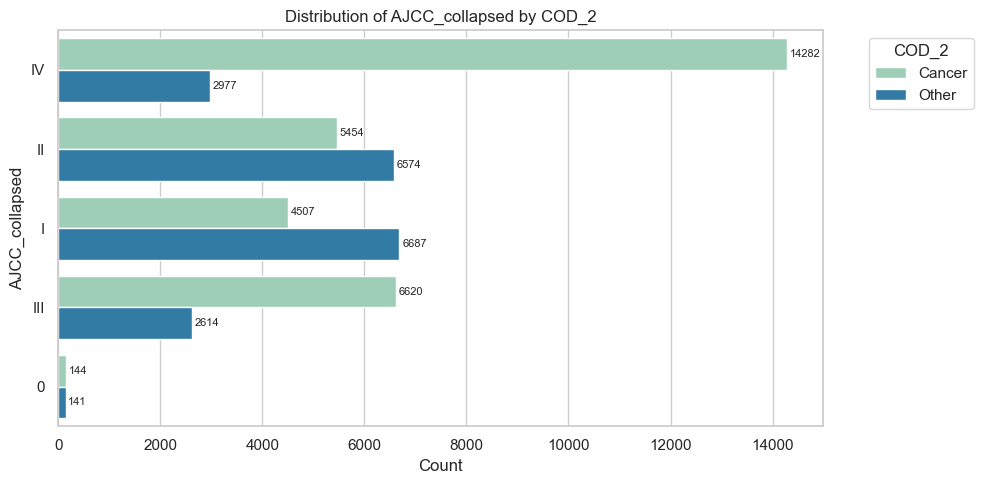

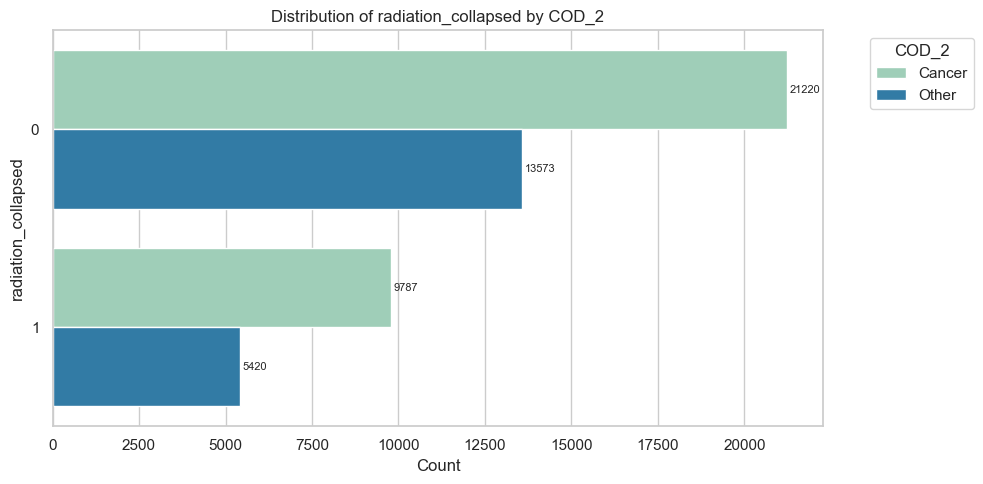

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# General seaborn style
sns.set_theme(style="whitegrid")

for col in categorical:
    plt.figure(figsize=(10,5))
    
    # Create a palette with as many colors as unique COD_2 values
    palette = sns.color_palette("YlGnBu", df['COD_2'].nunique())
    
    ax = sns.countplot(
        data=df,
        y=col,
        hue='COD_2',  
        order=df[col].value_counts().index,
        palette=palette
    )
    
    # Add counts on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)
    
    # Titles and labels
    plt.title(f'Distribution of {col} by COD_2', fontsize=12)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.legend(title="COD_2", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


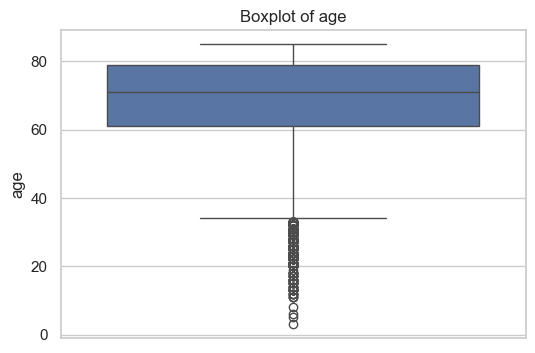

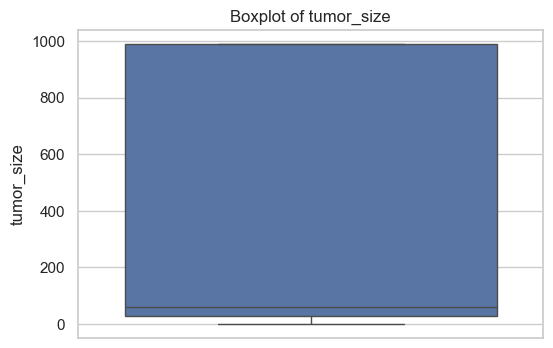

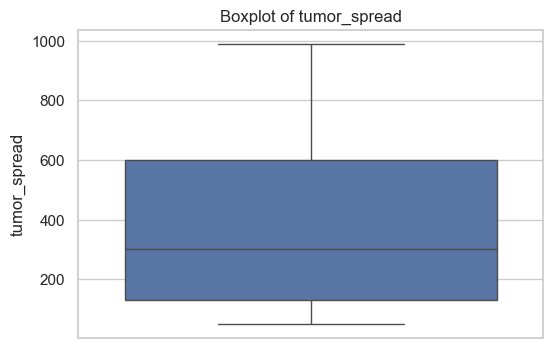

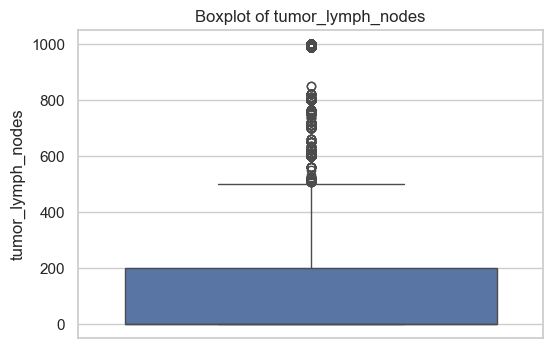

In [14]:
for col in numeric:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


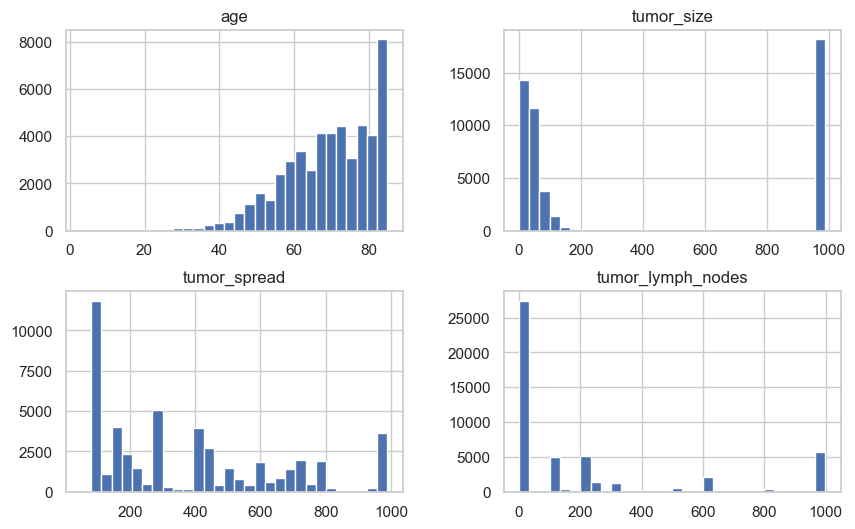

In [15]:
df[['age','tumor_size','tumor_spread','tumor_lymph_nodes']].hist(bins=30, figsize=(10,6))
plt.show()

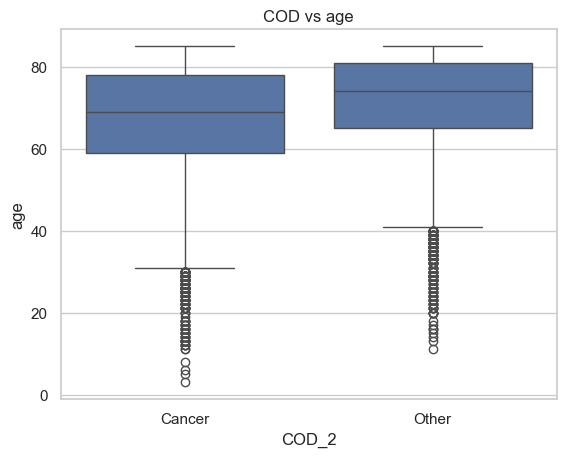

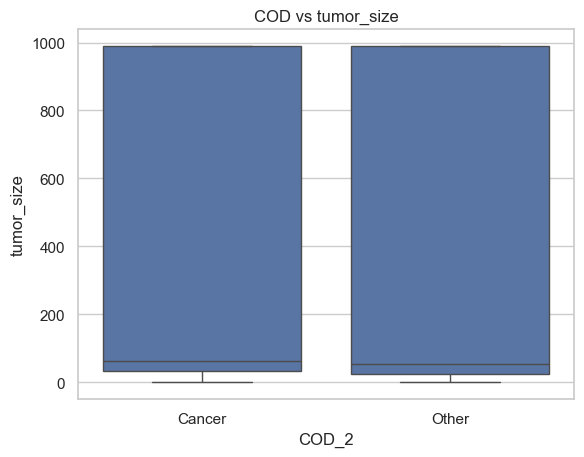

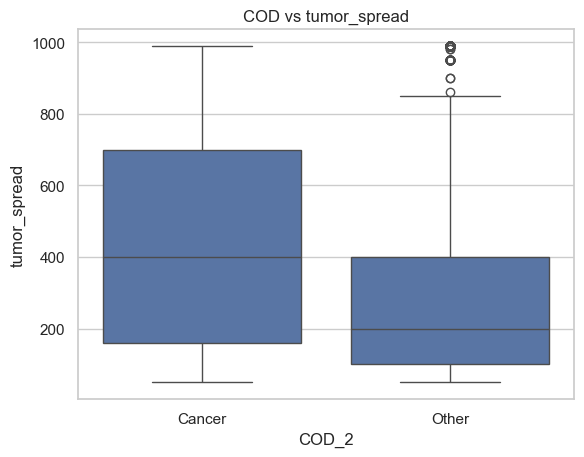

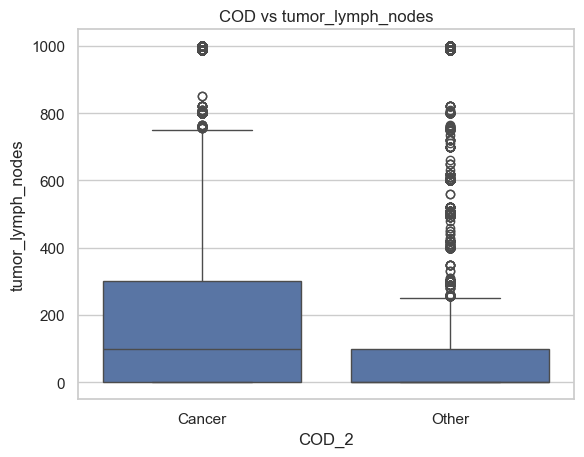

In [16]:
import seaborn as sns
for col in numeric:
    sns.boxplot(x='COD_2', y=col, data=df)
    plt.title(f'COD vs {col}')
    plt.show()

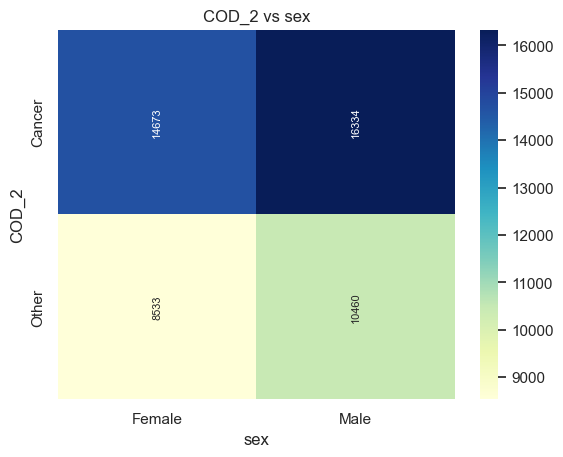

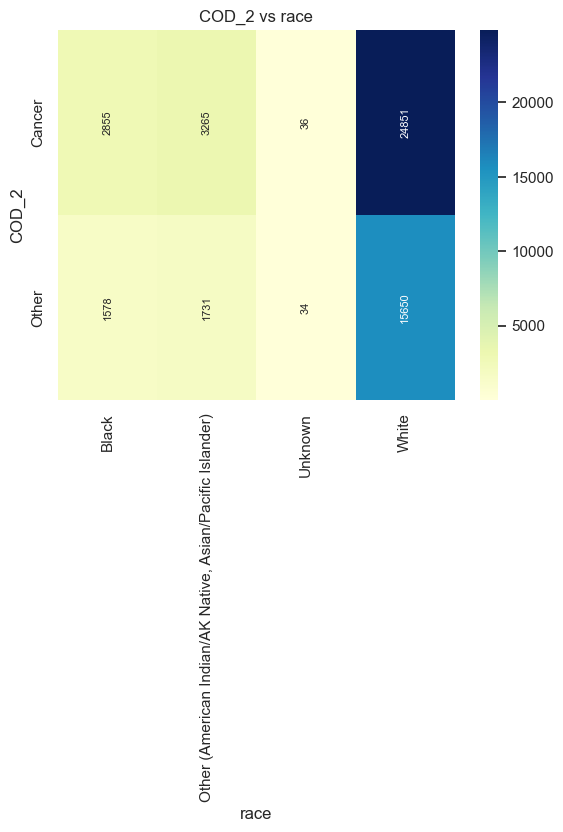

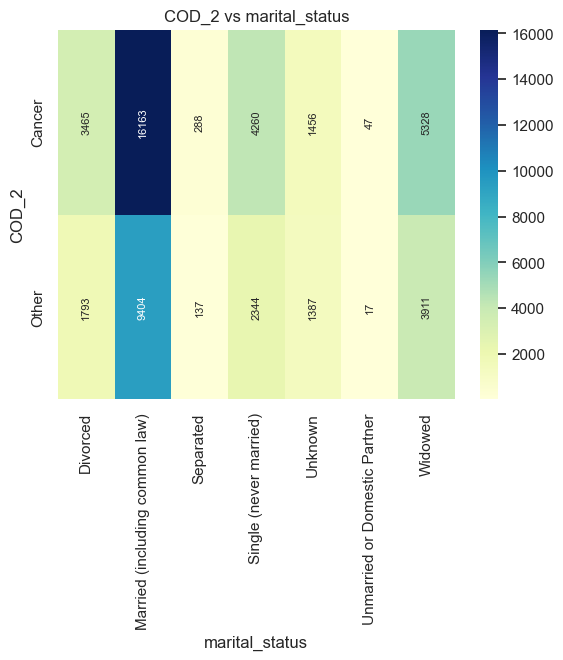

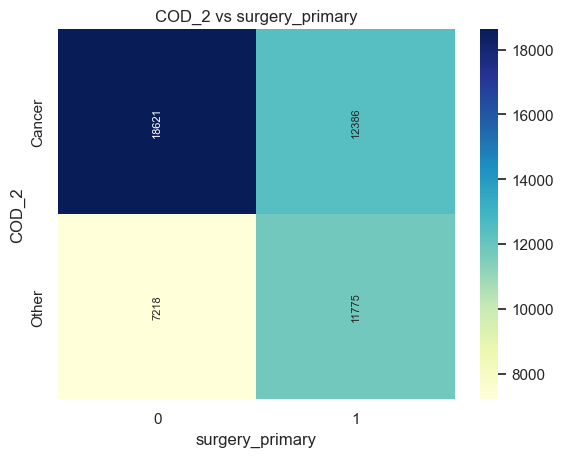

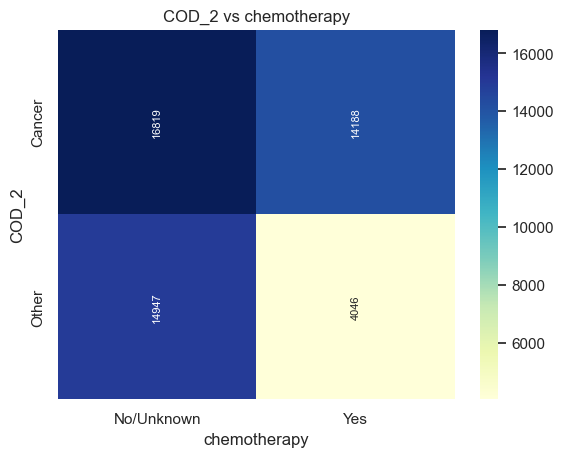

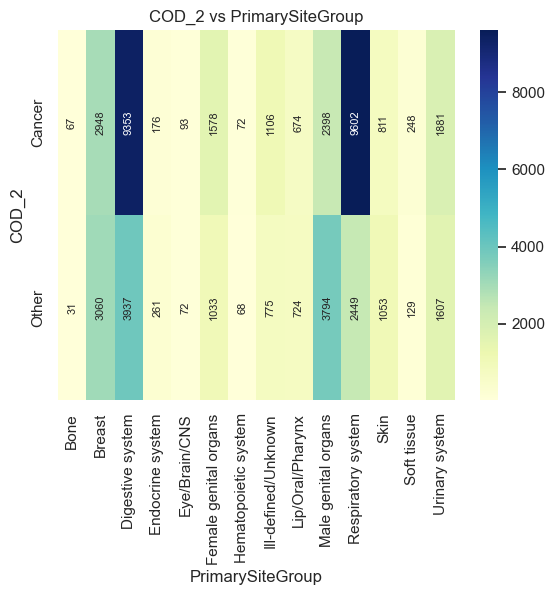

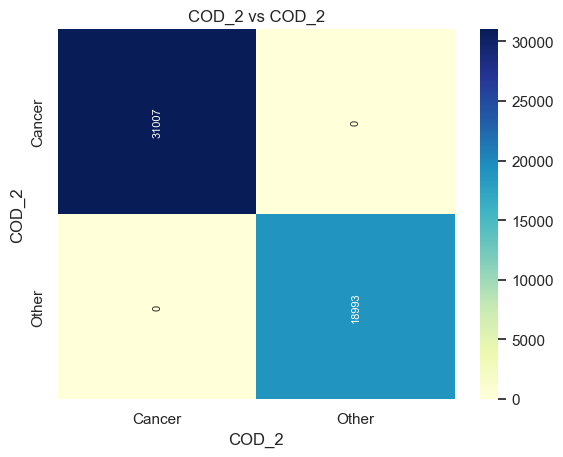

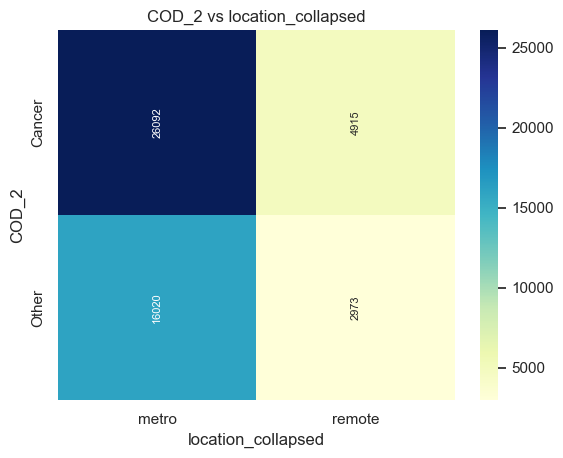

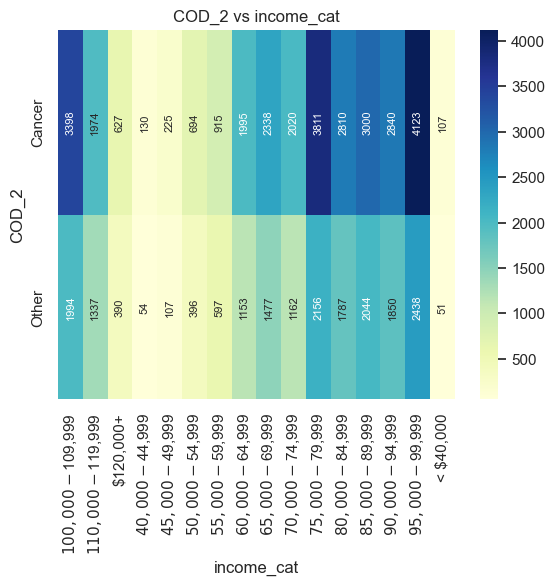

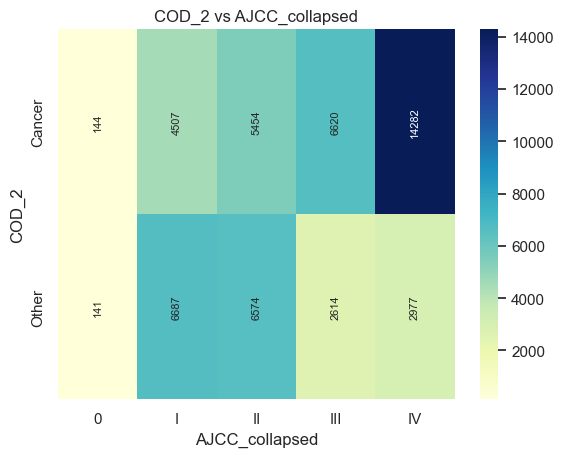

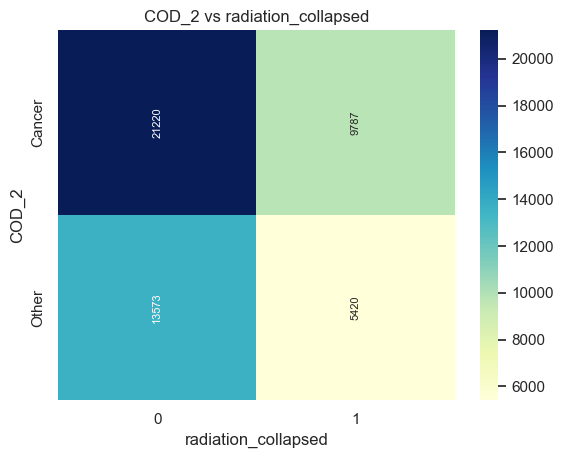

In [17]:
for col in categorical:
    cross = pd.crosstab(df['COD_2'], df[col])  # contingency table
    sns.heatmap(cross, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"size":8,"rotation":90})
    plt.title(f'COD_2 vs {col}')
    plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 228995 to 309478
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  50000 non-null  int16   
 1   sex                  50000 non-null  category
 2   race                 50000 non-null  category
 3   marital_status       50000 non-null  category
 4   tumor_size           50000 non-null  int16   
 5   tumor_spread         50000 non-null  int16   
 6   tumor_lymph_nodes    50000 non-null  int16   
 7   surgery_primary      50000 non-null  category
 8   chemotherapy         50000 non-null  category
 9   PrimarySiteGroup     50000 non-null  category
 10  COD_2                50000 non-null  category
 11  location_collapsed   50000 non-null  category
 12  income_cat           50000 non-null  category
 13  AJCC_collapsed       50000 non-null  category
 14  radiation_collapsed  50000 non-null  category
dtypes: category(11), i

# feature and target

In [19]:
X = df.drop('COD_2',axis=1)
y = df['COD_2']

In [20]:
X.columns

Index(['age', 'sex', 'race', 'marital_status', 'tumor_size', 'tumor_spread',
       'tumor_lymph_nodes', 'surgery_primary', 'chemotherapy',
       'PrimarySiteGroup', 'location_collapsed', 'income_cat',
       'AJCC_collapsed', 'radiation_collapsed'],
      dtype='object')

In [21]:
y.head()

228995    Cancer
291119    Cancer
177401    Cancer
150965     Other
98134      Other
Name: COD_2, dtype: category
Categories (2, object): ['Cancer', 'Other']

In [22]:
print(X.shape,y.shape)

(50000, 14) (50000,)


# splitting training and testing 

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=42)

In [24]:
print(X_test.shape,y_test.shape,X_train.shape,y_train.shape)

(20000, 14) (20000,) (30000, 14) (30000,)


In [25]:
numeric_features = X.select_dtypes(include=['int16']).columns
categorical_features = X.select_dtypes(include=['category']).columns

In [26]:
print(numeric_features)

Index(['age', 'tumor_size', 'tumor_spread', 'tumor_lymph_nodes'], dtype='object')


In [27]:
print(categorical_features)

Index(['sex', 'race', 'marital_status', 'surgery_primary', 'chemotherapy',
       'PrimarySiteGroup', 'location_collapsed', 'income_cat',
       'AJCC_collapsed', 'radiation_collapsed'],
      dtype='object')


# Scaling

In [28]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [29]:
preprocessor = ColumnTransformer(
    transformers=[('num',numeric_transformer,numeric_features),
                  ('cat',categorical_transformer,categorical_features)]
)

# logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [31]:
log_steps = [('preprocessor',preprocessor),('classifier',LogisticRegression(penalty = "l1", C =1, solver='liblinear'))]

log_pipeline = Pipeline(log_steps)


In [32]:
log_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'tumor_size', 'tumor_spread', 'tumor_lymph_nodes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['sex', 'race', 'marital_status', 'surgery_primary', 'chemotherapy',
       'PrimarySiteGroup', 'location_collapsed', 'income_cat',
       'AJCC_collapsed', 'radiation_collapsed'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

In [33]:
ypred_log = log_pipeline.predict(X_test)
log_matrix = confusion_matrix(y_test, ypred_log)
log_report = classification_report(y_test, ypred_log)
print(log_matrix)
print(log_report)

[[10008  2357]
 [ 3033  4602]]
              precision    recall  f1-score   support

      Cancer       0.77      0.81      0.79     12365
       Other       0.66      0.60      0.63      7635

    accuracy                           0.73     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.73      0.73      0.73     20000



In [34]:
log_yprob = log_pipeline.predict_proba(X_test)[:,1]
log_auc = roc_auc_score(y_test, log_yprob)
print(log_auc)

0.7742736313151254


# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
k_steps = [('preprocessor',preprocessor),('knn',KNeighborsClassifier())]
knn_pipeline = Pipeline(k_steps)

In [38]:
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
}

In [39]:
knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=3, scoring='roc_auc')
knn_grid.fit(X_train, y_train)
print("KNN best params:", knn_grid.best_params_)
print("KNN best CV ROC-AUC:", knn_grid.best_score_)

KNN best params: {'knn__n_neighbors': 7}
KNN best CV ROC-AUC: 0.7332968024364095


In [40]:
best_knn = knn_grid.best_estimator_

In [41]:
y_pred_knn = best_knn.predict(X_test)

In [42]:
knn_matrix = confusion_matrix(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)
print(knn_matrix,knn_report)

[[9739 2626]
 [3328 4307]]               precision    recall  f1-score   support

      Cancer       0.75      0.79      0.77     12365
       Other       0.62      0.56      0.59      7635

    accuracy                           0.70     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.70      0.70      0.70     20000



In [43]:
knn_yprob = best_knn.predict_proba(X_test)[:,1]
knn_auc = roc_auc_score(y_test, knn_yprob)
print(knn_auc)

0.7345382839314233


# SVM

In [44]:
from sklearn.svm import SVC

## linear kernel

In [45]:
## Linear Kernel
svcL_steps = [('preprocessor',preprocessor),
              ('svc', SVC(kernel = 'linear',
                          class_weight='balanced', probability=True))]

svcL_pipeline = Pipeline(svcL_steps)
svcL_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'tumor_size', 'tumor_spread', 'tumor_lymph_nodes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['sex', 'race', 'marital_status', 'surgery_primary', 'chemotherapy',
       'PrimarySiteGroup', 'location_collapsed', 'income_cat',
       'AJCC_collapsed', 'radiation_collapsed'],
      dtype='object'))])),
                ('svc',
                 SVC(class_weight='balanced', kernel='linear',
                     probability=True))])

In [46]:
ypred_svcL = svcL_pipeline.predict(X_test)
svcL_matrix = confusion_matrix(y_test, ypred_svcL)
svcL_report = classification_report(y_test, ypred_svcL)
print(svcL_matrix)
print(svcL_report)


[[8108 4257]
 [2025 5610]]
              precision    recall  f1-score   support

      Cancer       0.80      0.66      0.72     12365
       Other       0.57      0.73      0.64      7635

    accuracy                           0.69     20000
   macro avg       0.68      0.70      0.68     20000
weighted avg       0.71      0.69      0.69     20000



In [47]:
svcL_yprob = svcL_pipeline.predict_proba(X_test)[:,1]
svcL_auc = roc_auc_score(y_test, svcL_yprob)
print(svcL_auc)

0.7608435941170535


## Polynomial Kernel

In [48]:
svcPoly_steps = [('preprocessor',preprocessor),
                 ('svc', SVC(kernel = 'poly', degree = 3,
                             class_weight='balanced', probability=True))]
svcPoly_pipeline = Pipeline(svcPoly_steps)

In [49]:
svcPoly_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'tumor_size', 'tumor_spread', 'tumor_lymph_nodes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['sex', 'race', 'marital_status', 'surgery_primary', 'chemotherapy',
       'PrimarySiteGroup', 'location_collapsed', 'income_cat',
       'AJCC_collapsed', 'radiation_collapsed'],
      dtype='object'))])),
                ('svc',
                 SVC(class_weight='balanced', kernel='poly',
                     probability=True))])

In [50]:
ypred_svcPoly = svcPoly_pipeline.predict(X_test)

In [51]:
svcPoly_matrix = confusion_matrix(y_test, ypred_svcPoly)
svcPoly_report = classification_report(y_test, ypred_svcPoly)
print(svcPoly_matrix)
print(svcPoly_report)

[[8719 3646]
 [2002 5633]]
              precision    recall  f1-score   support

      Cancer       0.81      0.71      0.76     12365
       Other       0.61      0.74      0.67      7635

    accuracy                           0.72     20000
   macro avg       0.71      0.72      0.71     20000
weighted avg       0.73      0.72      0.72     20000



In [52]:
svcPoly_yprob = svcPoly_pipeline.predict_proba(X_test)[:,1]
svcPoly_auc = roc_auc_score(y_test, svcPoly_yprob)
print(svcPoly_auc)

0.7707220747663501


## RBF Kernel

In [53]:
svcRBF_steps = [('preprocessor',preprocessor),
                ('svc', SVC(kernel = 'rbf', gamma = 'scale',
                            class_weight='balanced',probability=True))]
svcRBF_pipeline = Pipeline(svcRBF_steps)

In [54]:
svcRBF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'tumor_size', 'tumor_spread', 'tumor_lymph_nodes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['sex', 'race', 'marital_status', 'surgery_primary', 'chemotherapy',
       'PrimarySiteGroup', 'location_collapsed', 'income_cat',
       'AJCC_collapsed', 'radiation_collapsed'],
      dtype='object'))])),
                ('svc', SVC(class_weight='balanced', probability=True))])

In [55]:
ypred_svcRBF = svcRBF_pipeline.predict(X_test)
svcRBF_matrix = confusion_matrix(y_test, ypred_svcRBF)
svcRBF_report = classification_report(y_test, ypred_svcRBF)
print(svcRBF_matrix)
print(svcRBF_report)

[[8755 3610]
 [2015 5620]]
              precision    recall  f1-score   support

      Cancer       0.81      0.71      0.76     12365
       Other       0.61      0.74      0.67      7635

    accuracy                           0.72     20000
   macro avg       0.71      0.72      0.71     20000
weighted avg       0.74      0.72      0.72     20000



In [56]:
svcRBF_yprob = svcRBF_pipeline.predict_proba(X_test)[:,1]
svcRBF_auc = roc_auc_score(y_test, svcRBF_yprob)
print(svcRBF_auc)

0.7726977539482733


# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
GNB_pipline = Pipeline([('preprocessor',preprocessor),('nb',GaussianNB())])


In [59]:
GNB_pipline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'tumor_size', 'tumor_spread', 'tumor_lymph_nodes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['sex', 'race', 'marital_status', 'surgery_primary', 'chemotherapy',
       'PrimarySiteGroup', 'location_collapsed', 'income_cat',
       'AJCC_collapsed', 'radiation_collapsed'],
      dtype='object'))])),
                ('nb', GaussianNB())])

In [60]:
ypred_GNB = GNB_pipline.predict(X_test)
GNB_matrix = confusion_matrix(y_test, ypred_GNB)
GNB_report = classification_report(y_test, ypred_GNB)


In [61]:
print(GNB_matrix,GNB_report)

[[9049 3316]
 [2550 5085]]               precision    recall  f1-score   support

      Cancer       0.78      0.73      0.76     12365
       Other       0.61      0.67      0.63      7635

    accuracy                           0.71     20000
   macro avg       0.69      0.70      0.69     20000
weighted avg       0.71      0.71      0.71     20000



In [62]:
GNB_yprob = GNB_pipline.predict_proba(X_test)[:, 1]

GNB_auc = roc_auc_score(y_test,GNB_yprob)
print("ROC-AUC:", GNB_auc)

ROC-AUC: 0.738582527578132


# evaluating

## confusion matrix

In [63]:
# Confusion matrices
conf_matrices = {"Logistic Regression": log_matrix,
                 "KNN": knn_matrix,
                 "SVM (Linear)": svcL_matrix,
                 "SVM (Poly)": svcPoly_matrix,
                 "SVM (RBF)": svcRBF_matrix,
                 "Gaussian NB": GNB_matrix}

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

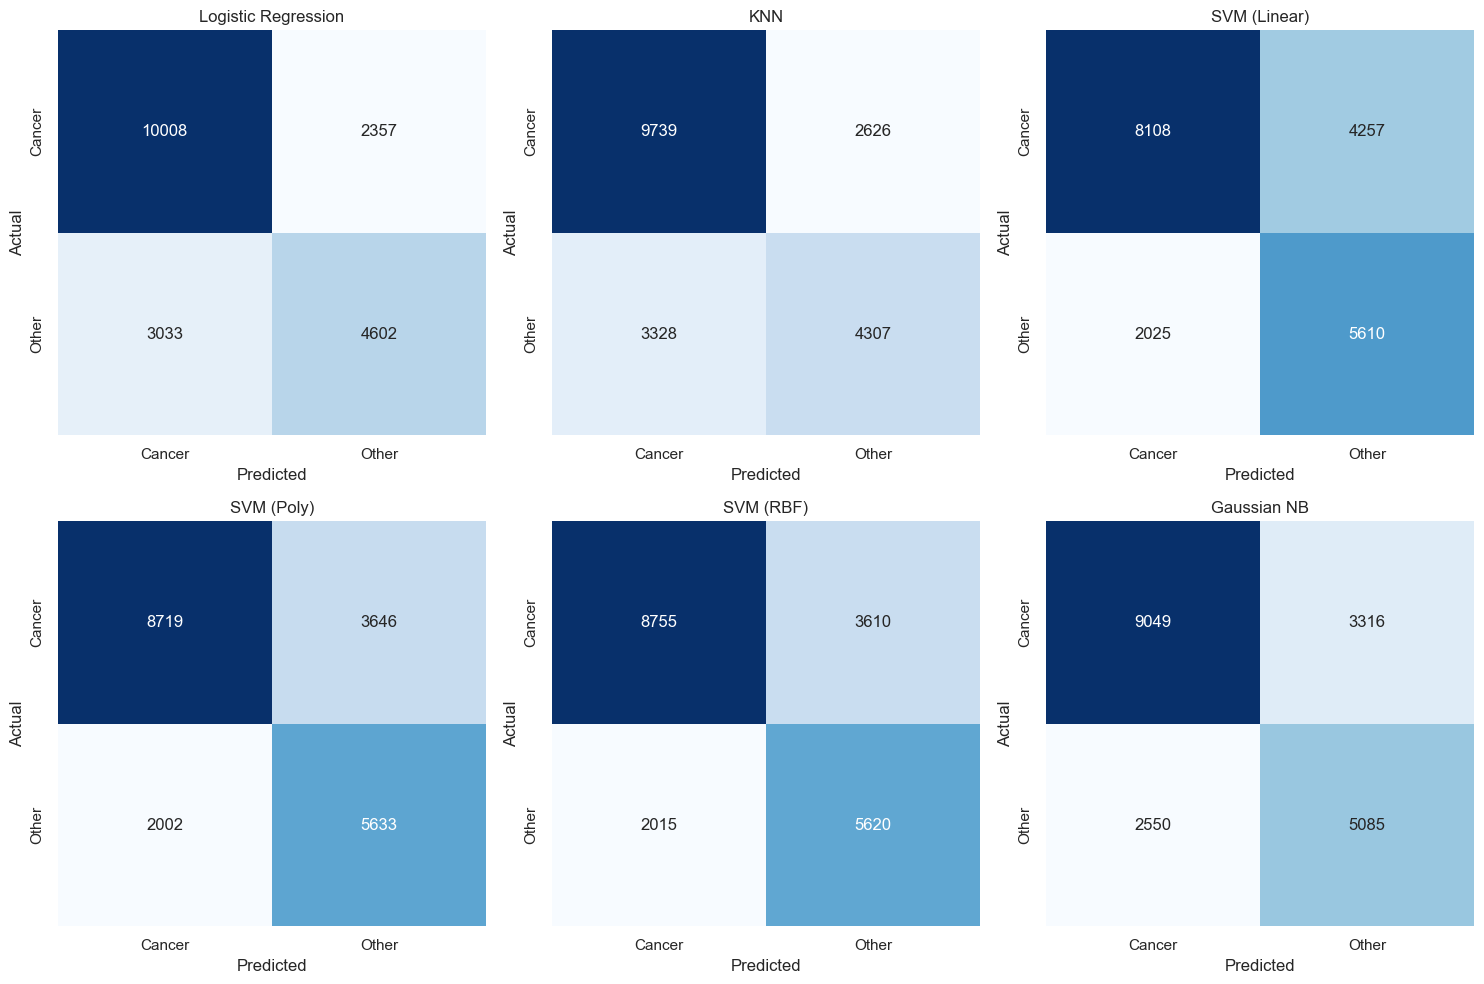

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for ax, (title, cm) in zip(axes.flatten(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.xaxis.set_ticklabels(["Cancer","Other"])
    ax.yaxis.set_ticklabels(["Cancer","Other"])

plt.tight_layout()
plt.show()

## roc auc curve

In [66]:
y_test_bin = y_test.map({'Other':1, 'Cancer':0})

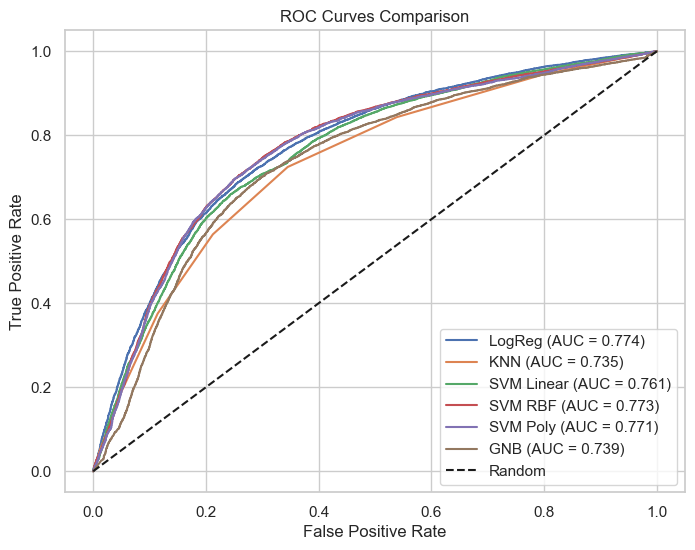

In [67]:
plt.figure(figsize=(8,6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin, log_yprob)
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {log_auc:.3f})")

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test_bin, knn_yprob)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {knn_auc:.3f})")

# SVM Linear
fpr_svmL, tpr_svmL, _ = roc_curve(y_test_bin, svcL_yprob)
plt.plot(fpr_svmL, tpr_svmL, label=f"SVM Linear (AUC = {svcL_auc:.3f})")

# SVM rbf
fpr_svmrbf, tpr_svmrbf, _ = roc_curve(y_test_bin, svcRBF_yprob)
plt.plot(fpr_svmrbf, tpr_svmrbf, label=f"SVM RBF (AUC = {svcRBF_auc:.3f})")

# SVM RBF
fpr_svmpoly, tpr_svmpoly, _ = roc_curve(y_test_bin, svcPoly_yprob)
plt.plot(fpr_svmpoly, tpr_svmpoly, label=f"SVM Poly (AUC = {svcPoly_auc:.3f})")

# GaussianNB
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_bin, GNB_yprob)
plt.plot(fpr_gnb, tpr_gnb, label=f"GNB (AUC = {GNB_auc:.3f})")

# Plot settings
plt.plot([0,1],[0,1],'k--', label='Random')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.show()


In [68]:
auc_scores = {
    "Logistic Regression": log_auc,
    "KNN": knn_auc,
    "SVM (Linear)": svcL_auc,
    "SVM (RBF)": svcRBF_auc,
    'SVM (Poly)':svcPoly_auc,
    "GaussianNB": GNB_auc
}


## comparison of test and predict

In [69]:
import numpy as np

models_preds = {
    "Logistic Regression": ypred_log,
    "KNN": y_pred_knn,
    "SVM (Linear)": ypred_svcL,
    "SVM (RBF)": ypred_svcRBF,
    'SVM (Poly)': ypred_svcPoly,
    "GaussianNB": ypred_GNB
}

# Compare with actual labels
summary = {}
for model, ypred in models_preds.items():
    correct = np.sum(ypred == y_test)
    wrong = np.sum(ypred != y_test)
    summary[model] = {"Correct": correct, "Wrong": wrong}

summary_df = pd.DataFrame(summary).T
summary_df


,Correct,Wrong
Logistic Regression,14610,5390
KNN,14046,5954
SVM (Linear),13718,6282
SVM (RBF),14375,5625
SVM (Poly),14352,5648
GaussianNB,14134,5866


## accuracy, precision, recall, f1, auc

                     Accuracy  Precision    Recall  F1-score       AUC
Logistic Regression   0.73050   0.767426  0.809381  0.787845  0.774274
KNN                   0.70230   0.745313  0.787626  0.765885  0.734538
SVM (Linear)          0.68590   0.800158  0.655722  0.720775  0.760844
SVM (RBF)             0.71875   0.812906  0.708047  0.756862  0.772698
SVM (Poly)            0.71760   0.813264  0.705135  0.755350  0.770722
GaussianNB            0.70670   0.780153  0.731824  0.755216  0.738583


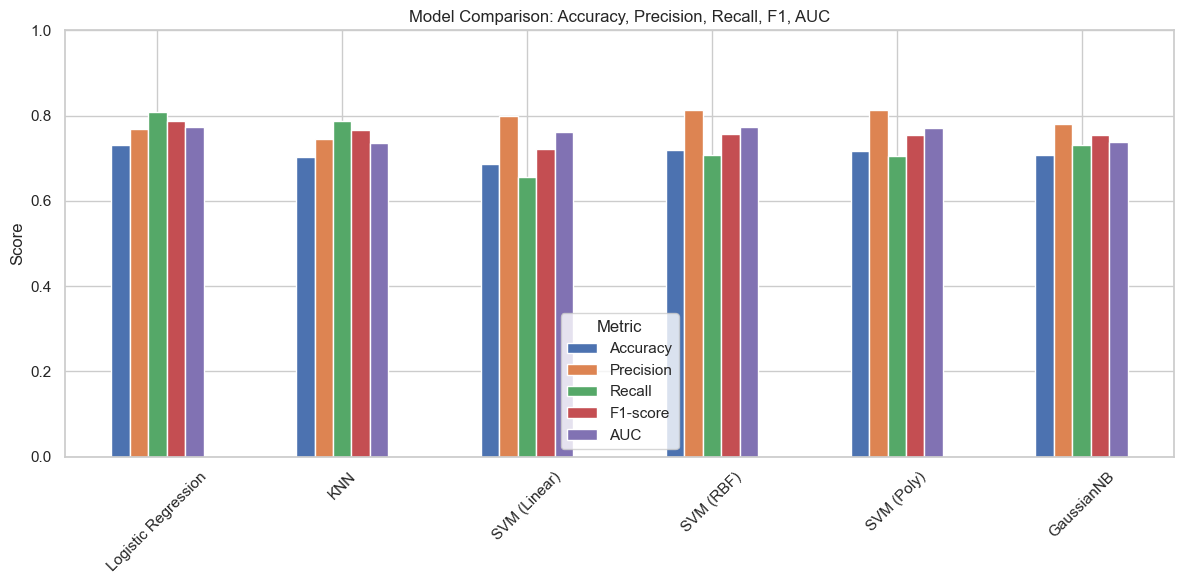

In [70]:
metrics = {}

for name, y_pred in models_preds.items():
    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label="Cancer"),
        "Recall": recall_score(y_test, y_pred, pos_label="Cancer"),
        "F1-score": f1_score(y_test, y_pred, pos_label="Cancer"),
        "AUC": auc_scores[name]   # <-- add AUC from your dict
    }

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics).T
print(df_metrics)

# Visualization
df_metrics.plot(kind="bar", figsize=(12,6))
plt.title("Model Comparison: Accuracy, Precision, Recall, F1, AUC")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


## specificity, recall of negative class (cancer speficic death)

In [71]:
specificity_scores = {}

for model_name, cm in conf_matrices.items():
    tn, fp, fn, tp = cm.ravel()  # unpack the matrix
    specificity = tn / (tn + fp)  # formula for specificity
    specificity_scores[model_name] = specificity

# Print results
for model, score in specificity_scores.items():
    print(f"{model}: Specificity = {score:.3f}")


Logistic Regression: Specificity = 0.809
KNN: Specificity = 0.788
SVM (Linear): Specificity = 0.656
SVM (Poly): Specificity = 0.705
SVM (RBF): Specificity = 0.708
Gaussian NB: Specificity = 0.732


C:\Users\Htet\AppData\Local\Temp\ipykernel_16828\1339407007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="viridis")


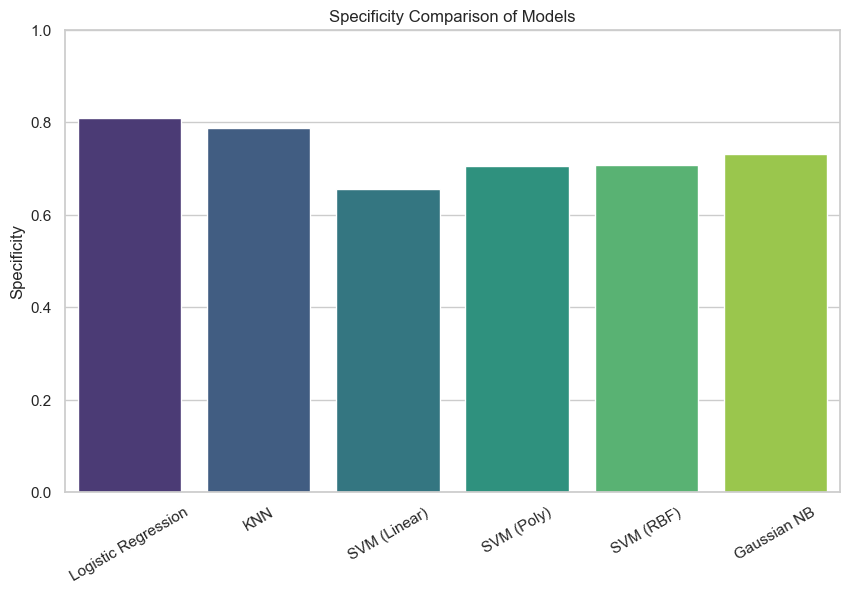

In [72]:
models = list(specificity_scores.keys())
scores = list(specificity_scores.values())

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=scores, palette="viridis")
plt.ylim(0,1)  # specificity is between 0 and 1
plt.ylabel("Specificity")
plt.title("Specificity Comparison of Models")
plt.xticks(rotation=30)
plt.show()


# testing on full data set

In [73]:
best_model = log_pipeline

In [74]:
df_pop = df_pop.astype({'age':'int16',
                'tumor_size':'int16',
                'tumor_spread':'int16',
                'tumor_lymph_nodes':'int16'})
df_pop = df_pop.astype({'surgery_primary':'category',
                'sex':'category',
                'race':'category',
                'marital_status':'category',
                'chemotherapy':'category',
                'PrimarySiteGroup':'category',
                'COD_2':'category',
                'income_cat':'category',
                'location_collapsed':'category',
                'AJCC_collapsed':'category',
                'radiation_collapsed':'category'})

In [75]:
X_pop = df_pop.drop('COD_2',axis=1)
y_pop = df_pop['COD_2']

In [76]:
ypred_p = best_model.predict(X_pop)

In [77]:
matrix_p = confusion_matrix(y_pop,ypred_p)
report_p = classification_report(y_pop,ypred_p)
print(matrix_p)
print(report_p)

[[274720  67835]
 [ 84769 126743]]
              precision    recall  f1-score   support

      Cancer       0.76      0.80      0.78    342555
       Other       0.65      0.60      0.62    211512

    accuracy                           0.72    554067
   macro avg       0.71      0.70      0.70    554067
weighted avg       0.72      0.72      0.72    554067



In [78]:
tn, fp, fn, tp = matrix_p.ravel()
# Metrics for **positive class** (Other death)
precision_pos = tp / (tp + fp)
recall_pos = tp / (tp + fn)         # Sensitivity
f1_pos = 2 * (precision_pos * recall_pos) / (precision_pos + recall_pos)
accuracy_pos = (tp + tn) / (tp + tn + fp + fn)

# Metrics for **negative class** (Cancer death)
# Flip roles: negative class is now "positive" for calculation
precision_neg = tn / (tn + fn)
recall_neg = tn / (tn + fp)         # Specificity
f1_neg = 2 * (precision_neg * recall_neg) / (precision_neg + recall_neg)
accuracy_neg = (tp + tn) / (tp + tn + fp + fn)

print("\nMetrics for Positive Class (Other death):")
print(f"Precision: {precision_pos:.3f}")
print(f"Recall (Sensitivity): {recall_pos:.3f}")
print(f"F1-score: {f1_pos:.3f}")
print(f"Accuracy: {accuracy_pos:.3f}")

print("\nMetrics for Negative Class (Cancer death):")
print(f"Precision: {precision_neg:.3f}")
print(f"Recall (Specificity): {recall_neg:.3f}")
print(f"F1-score: {f1_neg:.3f}")
print(f"Accuracy: {accuracy_neg:.3f}")


Metrics for Positive Class (Other death):
Precision: 0.651
Recall (Sensitivity): 0.599
F1-score: 0.624
Accuracy: 0.725

Metrics for Negative Class (Cancer death):
Precision: 0.764
Recall (Specificity): 0.802
F1-score: 0.783
Accuracy: 0.725


In [79]:
correct_P = np.sum(ypred_p == y_pop)
wrong_P = np.sum(ypred_p != y_pop)
summary['full'] = {"Correct": correct_P, "Wrong": wrong_P}

summary_df = pd.DataFrame(summary).T
summary_df

,Correct,Wrong
Logistic Regression,14610,5390
KNN,14046,5954
SVM (Linear),13718,6282
SVM (RBF),14375,5625
SVM (Poly),14352,5648
GaussianNB,14134,5866
full,401463,152604
